In [1]:
#ingest the data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./data/insurance.csv')

In [4]:
data.sample(10)

,age,sex,bmi,children,smoker,region,expenses
1055,55,male,27.6,0,no,northwest,10594.50
487,19,male,28.7,0,no,southwest,1253.94
1011,43,male,20.1,2,yes,southeast,18767.74
1121,46,male,38.2,2,no,southeast,8347.16
390,48,male,35.6,4,no,northeast,10736.87
339,46,female,27.7,1,no,southeast,8232.64
196,39,female,32.8,0,no,southwest,5649.72
1090,47,male,36.2,0,yes,southeast,41676.08
845,60,female,32.5,0,yes,southeast,45008.96
280,40,female,28.1,1,yes,northeast,22331.57


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.duplicated().sum()

1

In [8]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [9]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(1337, 7)

In [12]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [13]:
data.dtypes == 'object'

age         False
sex          True
bmi         False
children    False
smoker       True
region       True
expenses    False
dtype: bool

In [14]:
categorical_columns = data.columns[data.dtypes=='object']

In [15]:
numerical_columns = data.columns[data.dtypes!='object']

In [16]:
data[categorical_columns].describe().T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [17]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [18]:
data[categorical_columns]['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [19]:
data[categorical_columns]['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [20]:
data[categorical_columns]['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

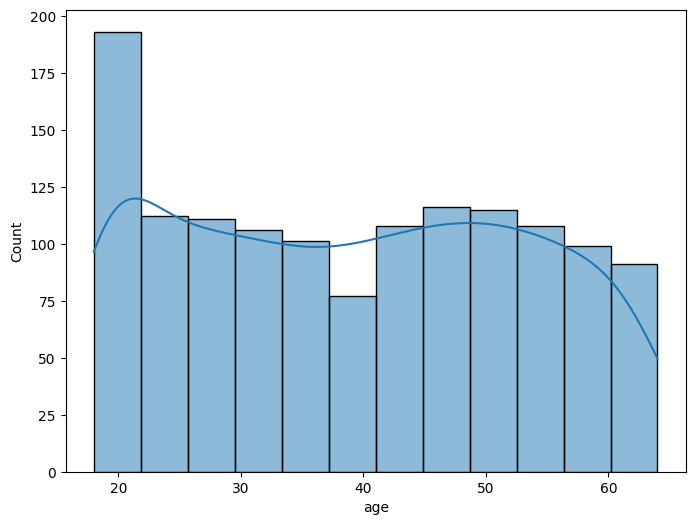

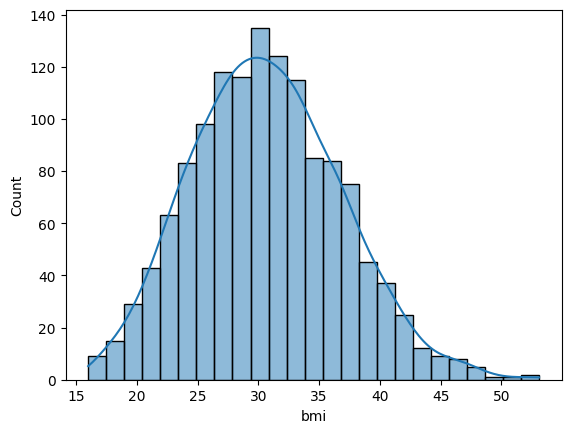

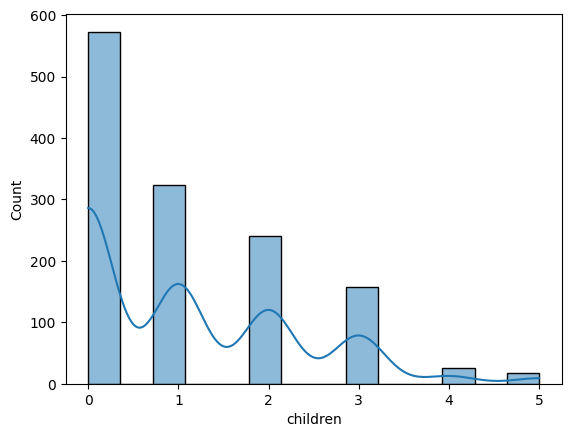

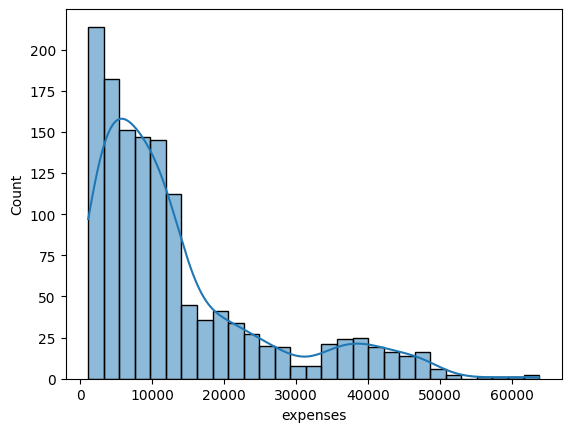

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

for col in numerical_columns:
    sns.histplot(data = data, x = col , kde = True)
    print('\n')
    plt.show()

<AxesSubplot:>

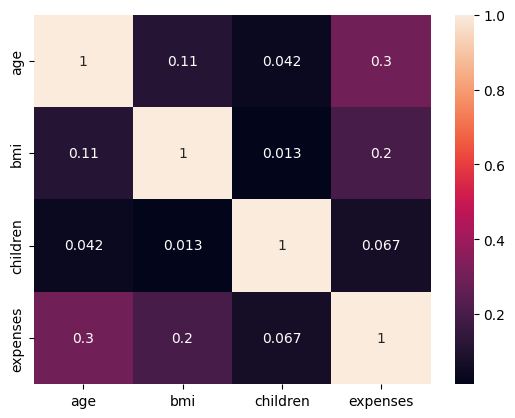

In [22]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [23]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [24]:
#encoding

In [25]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [26]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [27]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
#oridinal encoding
sex_map = {'male':1 , 'female':0}
smoker_map = {'yes':1, 'no':0}
region_map = {"southwest":1 , "southeast":2, "northwest":3, 'northeast':4}

In [29]:
data['sex'] = data['sex'].map(sex_map)
data['smoker'] = data['smoker'].map(smoker_map)
data['region'] = data['region'].map(region_map)

In [30]:
data.sample(10)

,age,sex,bmi,children,smoker,region,expenses
80,31,1,26.9,1,0,4,4441.21
531,62,0,31.7,0,0,4,14043.48
173,35,0,34.8,1,0,1,5246.05
707,49,1,28.7,3,0,3,10264.44
465,30,0,28.4,1,1,2,19521.97
26,63,0,23.1,0,0,4,14451.84
1150,18,0,30.3,0,0,4,2203.74
46,18,0,38.7,2,0,4,3393.36
1016,19,0,24.6,1,0,3,2709.24
339,46,0,27.7,1,0,2,8232.64
